In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from clustergram import Clustergram
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import umap


In [27]:
df_coords = pd.read_excel('data/Кластера case 624, OF_v23_27.02.2023.xlsx', sheet_name='WellCoord', header=1)
df_coords = df_coords.iloc[:, 1:]
df_coords['X'] = (df_coords['X WelltopNP4'] + df_coords['X TD']) / 2
df_coords['Y'] = (df_coords['Y WelltopNP4'] + df_coords['Y TD']) / 2
df_coords.head(5)

,Скважина,X WelltopNP4,Y WelltopNP4,X TD,Y TD,WGPR_RMS,Cluster,X,Y
0,4086G,389417.21,7527838.98,389693.34,7529499.37,670789440.0,-193372832.0,389555.275,7528669.175
1,4500G,392335.55,7532224.35,392802.62,7530999.43,95240400.0,-71669784.0,392569.085,7531611.890
2,4066G,389426.24,7526388.50,389053.92,7524823.05,753285632.0,-91267136.0,389240.080,7525605.775
3,4047G,389354.65,7523020.48,390020.00,7521555.97,457731840.0,-159441344.0,389687.325,7522288.225
4,4057G,389283.86,7523123.26,389455.37,7524720.29,515187968.0,-72189760.0,389369.615,7523921.775


### Weights

In [28]:
df_weights = pd.read_csv('data/DNN_weights.csv')
# df_weights.loc[:, df_weights.columns.str.contains('HM_BHP_RMS')].plot.line()


In [39]:
scaler = MinMaxScaler()

X_weights = df_weights.loc[:, df_weights.columns.str.contains('HM_BHP_RMS')]#.T.iloc[:,:-15]
X_weights = X_weights.loc[:, np.logical_not(X_weights.columns.str.contains('4503G'))]
X_weights = X_weights.loc[:, np.logical_not(X_weights.columns.str.contains('148P'))]
X_weights = X_weights.T.iloc[:,:-15]
#X_weights =  pd.DataFrame(scaler.fit_transform(X_weights), columns=X_weights.columns, index=X_weights.index)

X_weights

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
3401G / HM_BHP_RMS,0.143818,0.821226,0.916046,-0.401692,-0.028143,-0.057058,1.236026,0.193858,0.030196,1.233845,...,-1.045683,-0.203350,-0.537249,1.059972,-0.968692,0.205158,-0.345668,-0.172440,1.235528,0.230109
3402G / HM_BHP_RMS,0.252802,0.303818,-0.827241,0.695714,0.868847,0.064515,0.634590,-1.475963,-0.693363,0.096813,...,-0.613610,1.242352,1.395546,-0.876064,-0.905238,-0.096532,-2.368538,-0.349605,0.304146,0.280579
3403G_2 / HM_BHP_RMS,0.733850,-0.818742,2.168078,0.414737,0.974771,1.117271,-0.291774,-0.637372,-0.507987,0.830970,...,-0.222874,-2.192362,0.371508,-1.553620,-0.933419,-0.040776,-0.736646,0.147893,-0.264182,0.718615
3404G / HM_BHP_RMS,0.283241,-0.706587,0.905328,-0.632845,0.866588,1.303818,-0.663135,0.492368,-0.995133,0.280692,...,-2.222557,-0.635298,0.692723,0.129817,0.515950,0.065339,0.992604,0.486164,-0.180314,-0.409827
3405G / HM_BHP_RMS,-0.039540,-0.351540,1.001965,1.167269,-0.234653,0.487015,0.036141,0.911553,-0.484971,-1.197392,...,-0.303473,-1.266158,-0.643983,-1.214116,0.090555,-0.027873,-0.999638,-0.001351,-0.300394,-0.514155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575G_2 / HM_BHP_RMS,-1.588752,-1.536858,0.147538,0.238364,-0.054438,0.846231,0.829998,-0.543680,1.043536,-0.179573,...,2.010162,2.349023,2.109300,2.719167,1.465359,3.444000,1.405206,2.053718,0.311206,6.464715
4576G_1 / HM_BHP_RMS,0.207641,-1.042036,-0.839470,1.520110,0.237380,-0.179982,0.233826,-0.069549,0.199917,-0.223988,...,-0.642211,0.552811,-0.281596,0.018137,-0.294731,0.704874,2.132640,0.447350,0.480733,3.364878
4577G / HM_BHP_RMS,0.295360,-0.569560,0.077572,0.087427,-0.668478,-0.251236,0.512358,-0.324721,0.106298,-1.760387,...,-0.199269,2.260895,-0.226190,-0.394352,0.221023,-0.044936,3.389765,-0.029616,2.372223,7.750711
4578G_1 / HM_BHP_RMS,-0.553003,-0.070338,-0.025216,-0.715063,-0.020375,0.283694,0.797526,-0.152250,-0.432825,-0.113501,...,-0.358520,0.731173,0.432415,1.510091,2.262537,1.851965,1.615114,2.192361,0.000529,5.406662


K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.02791142463684082 seconds.
K=3 fitted in 0.019932270050048828 seconds.
K=4 fitted in 0.0219266414642334 seconds.
K=5 fitted in 0.0219266414642334 seconds.
K=6 fitted in 0.022922515869140625 seconds.
K=7 fitted in 0.025913000106811523 seconds.
K=8 fitted in 0.02192831039428711 seconds.
K=9 fitted in 0.024914979934692383 seconds.


c:\Users\SalnikovMA\Anaconda3\envs\Torch_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\SalnikovMA\Anaconda3\envs\Torch_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\SalnikovMA\Anaconda3\envs\Torch_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\SalnikovMA\Anaconda3\envs\Torch_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is k

<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

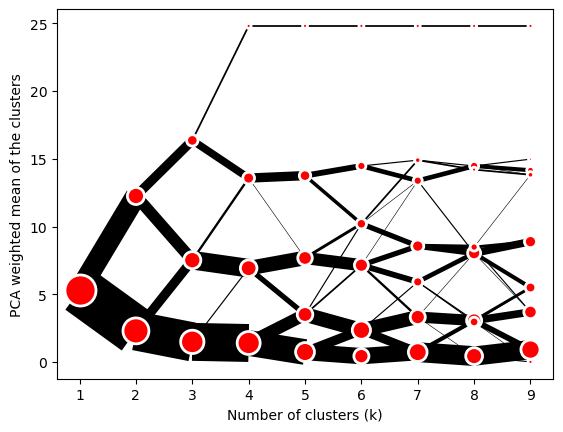

In [40]:
cgram = Clustergram(range(1, 10), n_init=10)
cgram.fit(X_weights)
cgram.plot()

In [41]:
# Kmeans
#weights_model = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_weights)

# AgglomerativeClustering
weights_model = AgglomerativeClustering(n_clusters=4).fit(X_weights)

pca = PCA(n_components=3)
Xt = pca.fit_transform(X_weights)

df_res_weights = pd.DataFrame(Xt)
df_res_weights['cluster_weights'] = weights_model.labels_
df_res_weights['well'] = X_weights.index

names = []

clf = NearestCentroid()
clf.fit(X_weights, weights_model.labels_)
centroids = clf.centroids_

# Kmeans
# centroids = weights_model.cluster_centers_

for n_cluster, center in enumerate(centroids):
    data = X_weights.iloc[df_res_weights.index[df_res_weights['cluster_weights']==n_cluster]]
    lst = []
    name = []
    for indx, dat in zip(data.index, data.values):
        dist = np.linalg.norm(dat - center)
        lst.append(dist)
        name.append(indx)
    name = name[np.argmin(np.array(lst))]
    names.append(name)

df_res_weights['centroid_weights'] = np.where(df_res_weights['well'].isin(names), 1, 0)
df_res_weights['cluster_weights'] = df_res_weights['cluster_weights'].astype(str)

px.scatter_3d(df_res_weights, x=0, y=1, z=2, hover_name="well", color='cluster_weights', symbol='centroid_weights')

In [42]:
df_res_weights['X'] = 1
df_res_weights['Y'] = 1

df_res_weights['cluster_weights'] = df_res_weights['cluster_weights'].astype(str)

for i in df_coords['Скважина']:
    df_res_weights.loc[df_res_weights.index[df_res_weights['well'].str.contains(i)==True], 'X'] = df_coords['X'][df_coords['Скважина']==i].values[0]
    df_res_weights.loc[df_res_weights.index[df_res_weights['well'].str.contains(i)==True], 'Y'] = df_coords['Y'][df_coords['Скважина']==i].values[0]

In [43]:
fig = px.scatter(df_res_weights, x='X', y='Y', color='cluster_weights', hover_name='well', symbol='centroid_weights')
fig.show()
fig.write_html("output/weights_map.html")

### Shap

In [44]:
df_shap = pd.read_csv('data/catboost_shap_values.csv')
# df_shap.loc[:, df_shap.columns.str.contains('HM_BHP_RMS')].plot.line()

In [57]:
scaler = MinMaxScaler()

X_shap = df_shap.loc[:, df_shap.columns.str.contains('HM_BHP_RMS')]
X_shap = X_shap.loc[:, np.logical_not(X_shap.columns.str.contains('4503G'))]
X_shap = X_shap.loc[:, np.logical_not(X_shap.columns.str.contains('148P'))]
X_shap = X_shap.T.iloc[:,:-15]
#X_shap =  pd.DataFrame(scaler.fit_transform(X_shap), columns=X_shap.columns, index=X_shap.index)

X_shap

,0,1,2,3,4,5,6,7,8,9,...,1362,1363,1364,1365,1366,1367,1368,1369,1370,1371
3401G / HM_BHP_RMS,-0.016303,0.035768,-0.038385,-0.149406,0.285501,0.155962,-0.156656,0.000952,-0.006823,0.124798,...,0.056229,0.588135,0.012981,-0.004740,0.011511,0.099254,0.072052,0.123292,0.056490,-0.000978
3402G / HM_BHP_RMS,-0.033031,0.111127,-0.001283,-0.106253,0.606575,0.416628,-0.023226,-0.006146,0.044905,0.163608,...,0.074773,1.010203,0.063296,-0.006612,0.059773,0.073073,0.233377,0.022509,0.058992,-0.228335
3403G_2 / HM_BHP_RMS,-0.002178,0.018834,-0.015067,-0.107579,0.443006,0.298274,-0.235236,-0.010875,0.039094,0.069743,...,0.083679,0.565981,-0.168329,0.001158,-0.001555,0.070517,0.057370,0.119683,-0.000444,-0.041194
3404G / HM_BHP_RMS,-0.001526,0.009133,0.001893,-0.159836,0.288808,0.202015,-0.034775,-0.005953,0.014830,0.198682,...,0.026875,0.766329,0.026144,0.037677,-0.011127,0.249727,0.238206,0.076348,-0.008895,0.019290
3405G / HM_BHP_RMS,-0.039623,0.026979,-0.011984,-0.203967,0.142606,0.262601,-0.009473,-0.016790,0.004692,0.138910,...,0.068545,0.714022,0.002579,0.019988,-0.017894,0.225322,0.231902,0.059428,0.016368,0.010104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575G_2 / HM_BHP_RMS,-0.036004,0.001958,0.065048,-0.183748,0.044901,0.107658,0.359850,0.126512,0.033125,0.227726,...,0.026330,0.730825,0.040980,0.043590,-0.024078,0.203411,0.751031,-0.440407,-0.005892,0.065549
4576G_1 / HM_BHP_RMS,-0.001073,0.006028,0.030828,-0.171351,0.037176,0.036073,0.181947,0.077734,0.016218,0.096582,...,-0.001004,0.227209,0.025931,0.020347,-0.021032,0.086856,0.318682,-0.212300,-0.010899,0.067593
4577G / HM_BHP_RMS,-0.031794,-0.011963,-0.033445,-0.186799,0.051255,0.055014,0.698886,0.094097,0.226911,0.185329,...,0.003859,0.269341,0.255407,0.056731,-0.071566,0.112731,0.413532,-0.371359,0.002152,0.302875
4578G_1 / HM_BHP_RMS,0.111070,-0.001742,0.008096,-0.130732,0.011218,0.002104,0.241875,0.091088,0.082077,0.067192,...,-0.003729,0.224149,0.115201,-0.008625,-0.005966,0.063688,0.205336,-0.195329,-0.000573,0.081840


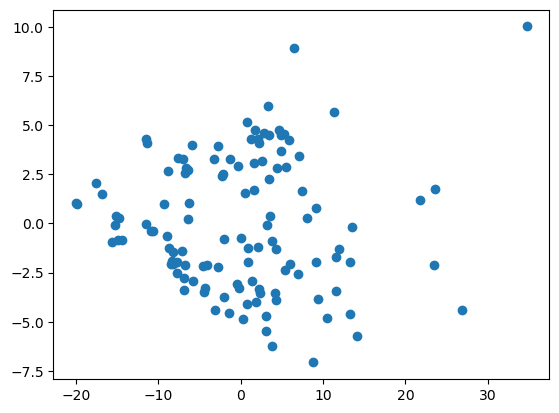

In [58]:
pca = PCA()
Xt = pca.fit_transform(X_shap)
plot = plt.scatter(Xt[:,0], Xt[:,1])
plt.show()

In [59]:
pca = PCA(n_components=3)
Xt = pca.fit_transform(X_shap)
px.scatter_3d(x=Xt[:,0], y=Xt[:,1], z=Xt[:,2])

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.023918867111206055 seconds.
K=3 fitted in 0.02391982078552246 seconds.
K=4 fitted in 0.024916648864746094 seconds.
K=5 fitted in 0.024916648864746094 seconds.
K=6 fitted in 0.026909828186035156 seconds.
K=7 fitted in 0.029900312423706055 seconds.
K=8 fitted in 0.029900074005126953 seconds.


c:\Users\SalnikovMA\Anaconda3\envs\Torch_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\SalnikovMA\Anaconda3\envs\Torch_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\SalnikovMA\Anaconda3\envs\Torch_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\SalnikovMA\Anaconda3\envs\Torch_Env\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning:

KMeans is k

K=9 fitted in 0.03289008140563965 seconds.


<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

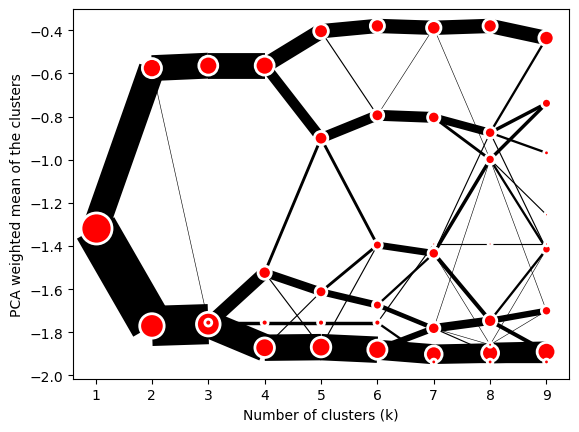

In [48]:
cgram = Clustergram(range(1, 10), n_init=10)
cgram.fit(X_shap)
cgram.plot()

In [61]:
# # Kmeans
# shap_model = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_shap)

# AgglomerativeClustering
shap_model = AgglomerativeClustering(n_clusters=3).fit(X_shap)

pca = PCA(n_components=3)
Xt = pca.fit_transform(X_shap)
df_res_shap_values = pd.DataFrame(Xt)
df_res_shap_values['cluster_shap_values'] = shap_model.labels_
df_res_shap_values['well'] = X_shap.index

names = []

# # Kmeans
# centroids = shap_model.cluster_centers_

# AgglomerativeClustering
clf = NearestCentroid()
clf.fit(X_shap, shap_model.labels_)
centroids = clf.centroids_

for n_cluster, center in enumerate(centroids):
    data = X_shap.iloc[df_res_shap_values.index[df_res_shap_values['cluster_shap_values']==n_cluster]]
    lst = []
    name = []
    for indx, dat in zip(data.index, data.values):
        dist = np.linalg.norm(dat - center)
        lst.append(dist)
        name.append(indx)
    name = name[np.argmin(np.array(lst))]
    names.append(name)

df_res_shap_values['centroid_shap'] = np.where(df_res_shap_values['well'].isin(names), 1, 0)
df_res_shap_values['cluster_shap_values'] = df_res_shap_values['cluster_shap_values'].astype(str)

px.scatter_3d(df_res_shap_values, x=0, y=1, z=2, hover_name="well", color='cluster_shap_values', symbol='centroid_shap')

In [62]:
df_res_shap_values['X'] = 1
df_res_shap_values['Y'] = 1

df_res_shap_values['cluster_shap_values'] = df_res_shap_values['cluster_shap_values'].astype(str)

for i in df_coords['Скважина']:
    df_res_shap_values.loc[df_res_shap_values.index[df_res_shap_values['well'].str.contains(i)==True], 'X'] = df_coords['X'][df_coords['Скважина']==i].values[0]
    df_res_shap_values.loc[df_res_shap_values.index[df_res_shap_values['well'].str.contains(i)==True], 'Y'] = df_coords['Y'][df_coords['Скважина']==i].values[0]

In [63]:
fig = px.scatter(df_res_shap_values, x='X', y='Y', color='cluster_shap_values', hover_name='well', symbol='centroid_shap')
fig.show()
fig.write_html("output/shap_values_map.html")

### Формирование таблицы кластеров

In [64]:
df = pd.read_excel('data/Global_Unc6_OF_v23_structured.xlsx', header=2)
# outputs = pd.unique(df.iloc[0, 32:])
df = df.iloc[:, 1:]
new_header_1 = list(df.columns)
new_header_2 = df.iloc[0]
new_header = [str(i) + ' / ' + str(j) if 'Unnamed' not in i else j for i, j in zip(new_header_1, new_header_2)]
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

case_name = 'FULL_TNAV__624'

df = df[df['Case_Name']==case_name]

In [65]:
for well in df_res_shap_values['well']:
    df_res_shap_values.loc[df_res_shap_values.index[df_res_shap_values['well'].str.contains(well)==True], 'HM_BHP_RMS'] = df.loc[:, df.columns.str.contains(well)].values[0]

In [66]:
df_res_shap_values[['well', 'feature']] = df_res_shap_values['well'].str.split("/", expand = True)

In [67]:
clusters_table = df_res_shap_values[['well', 'HM_BHP_RMS', 'cluster_shap_values', 'centroid_shap']]
clusters_table.loc[:, 'cluster_weights'] = df_res_weights['cluster_weights'].values
clusters_table.loc[:, 'centroid_weights'] = df_res_weights['centroid_weights'].values

C:\Users\SalnikovMA\AppData\Local\Temp\ipykernel_18824\2269183530.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\SalnikovMA\AppData\Local\Temp\ipykernel_18824\2269183530.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [68]:
df_ = pd.read_excel('data/Global_Unc6_OF_v23_structured.xlsx')
feature_df = df_weights.loc[:, df_weights.columns.str.contains('HM_BHP_RMS')].T.iloc[:,-15:]
f_n = [i+'_Poly' for i in df_.iloc[2:3, 2:16].loc[2].to_list() + ['Loss']]
feature_df.columns = f_n
feature_df

,$LN_gamma_Swcr_Poly,$LN_gamma_Sgcr_Poly,$Krw_Sorw_Poly,$Kro_Somax_Poly,$Krg_Swl_Poly,$Krg_Sorg_Poly,$gamma_perm_Poly,$Corey_water_Poly,$Corey_O_W_Poly,$Corey_O_G_Poly,$Corey_gas_Poly,$beta_perm_Poly,$Aq_length_Poly,$ANI_Poly,Loss_Poly
148P / HM_BHP_RMS,1.157817,1.152741,0.149527,0.550076,0.775721,0.321880,-0.929179,3.001916,1.000424,1.891041,1.142070,2.796128,4776.348145,0.490632,0.001983
3401G / HM_BHP_RMS,1.102002,1.100923,0.100452,0.582842,0.661531,0.200611,-0.997177,4.983869,1.203680,2.160733,2.000000,2.451174,5080.827148,0.247199,0.004517
3402G / HM_BHP_RMS,1.110850,1.111260,0.237419,0.565883,0.538078,0.209509,0.175770,3.053288,1.308954,1.767886,1.056915,2.690707,5279.341797,0.101054,0.001653
3403G_2 / HM_BHP_RMS,1.118829,1.101766,0.209736,0.566759,0.649060,0.225593,-0.505303,3.000380,1.098306,1.380014,1.984668,2.452309,7634.756348,0.106048,0.030930
3404G / HM_BHP_RMS,1.101149,1.109259,0.101114,0.649106,0.503557,0.390612,-0.990069,3.906125,1.139623,1.528271,1.142630,2.659122,4296.942383,0.127654,0.000152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575G_2 / HM_BHP_RMS,1.100000,1.100000,0.100000,0.550000,0.500000,0.200000,-1.000000,3.000000,1.000000,1.000000,1.000000,2.450000,3000.000000,0.100000,6.293936
4576G_1 / HM_BHP_RMS,1.123241,1.100000,0.250000,0.550000,0.743004,0.400000,-1.000000,5.000000,1.000000,2.500000,1.000000,2.450000,7999.999512,0.100000,1.301059
4577G / HM_BHP_RMS,1.100000,1.250000,0.100000,0.550000,0.509568,0.400000,-1.000000,5.000000,1.500000,1.000000,1.023056,2.450000,3158.281982,0.100000,5.910480
4578G_1 / HM_BHP_RMS,1.167395,1.100000,0.100000,0.550000,0.500000,0.400000,-1.000000,3.000000,1.000000,1.000000,1.000000,2.450000,3000.000000,0.101235,4.556865


In [69]:

feature_df_shap = df_shap.loc[:, df_shap.columns.str.contains('HM_BHP_RMS')].T.iloc[:,-15:]
f_n = [i+'_SHAP' for i in df_.iloc[2:3, 2:16].loc[2].to_list() + ['Loss']]
feature_df_shap.columns = f_n
feature_df_shap

,$LN_gamma_Swcr_SHAP,$LN_gamma_Sgcr_SHAP,$Krw_Sorw_SHAP,$Kro_Somax_SHAP,$Krg_Swl_SHAP,$Krg_Sorg_SHAP,$gamma_perm_SHAP,$Corey_water_SHAP,$Corey_O_W_SHAP,$Corey_O_G_SHAP,$Corey_gas_SHAP,$beta_perm_SHAP,$Aq_length_SHAP,$ANI_SHAP,Loss_SHAP
148P / HM_BHP_RMS,1.242045,1.101782,0.219124,0.575246,0.716826,0.259527,-0.177251,4.552872,1.385394,2.500000,1.996156,2.614219,6566.359224,0.439004,1.828152e-05
3401G / HM_BHP_RMS,1.149133,1.100706,0.195046,0.699204,0.722951,0.397066,-0.622176,4.985221,1.500000,1.027292,1.395798,2.451255,3719.952355,0.469221,9.814066e-07
3402G / HM_BHP_RMS,1.101363,1.250000,0.237613,0.620459,0.500000,0.218111,0.114413,4.984408,1.037700,1.269049,1.999292,2.846214,7453.218187,0.219038,2.485058e-05
3403G_2 / HM_BHP_RMS,1.222856,1.235013,0.116425,0.550000,0.546696,0.359897,0.167679,3.617600,1.350050,1.208157,1.939640,2.812950,8000.000000,0.100000,1.599506e-05
3404G / HM_BHP_RMS,1.214716,1.170212,0.121251,0.584861,0.607437,0.274145,-0.955940,3.569704,1.441576,1.000000,1.020610,2.583925,7951.192456,0.115374,1.368735e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575G_2 / HM_BHP_RMS,1.195830,1.236828,0.229859,0.550214,0.626571,0.332906,-0.999423,4.506675,1.239932,1.794345,1.026607,2.506979,5953.818571,0.244631,1.350396e+01
4576G_1 / HM_BHP_RMS,1.175392,1.217176,0.244975,0.550877,0.626566,0.335729,-0.979919,4.154376,1.217774,1.155164,1.029923,2.507809,5449.816995,0.181348,8.797997e-05
4577G / HM_BHP_RMS,1.205162,1.237029,0.136353,0.552501,0.642887,0.329723,-0.975936,4.259982,1.435472,1.742087,1.001258,2.543995,6320.570287,0.210068,6.262376e+00
4578G_1 / HM_BHP_RMS,1.185845,1.224734,0.182823,0.550110,0.605552,0.378157,-0.998083,4.235855,1.174138,1.792645,1.000257,2.492803,5938.842236,0.192299,8.341410e+00


In [70]:
clusters_table = pd.concat([clusters_table, feature_df.reset_index(), feature_df_shap.reset_index()], axis=1)
clusters_table

,well,HM_BHP_RMS,cluster_shap_values,centroid_shap,cluster_weights,centroid_weights,index,$LN_gamma_Swcr_Poly,$LN_gamma_Sgcr_Poly,$Krw_Sorw_Poly,...,$Krg_Sorg_SHAP,$gamma_perm_SHAP,$Corey_water_SHAP,$Corey_O_W_SHAP,$Corey_O_G_SHAP,$Corey_gas_SHAP,$beta_perm_SHAP,$Aq_length_SHAP,$ANI_SHAP,Loss_SHAP
0,3401G,-0.850989,1,0.0,3,0.0,148P / HM_BHP_RMS,1.157817,1.152741,0.149527,...,0.259527,-0.177251,4.552872,1.385394,2.500000,1.996156,2.614219,6566.359224,0.439004,1.828152e-05
1,3402G,-1.194144,1,0.0,3,0.0,3401G / HM_BHP_RMS,1.102002,1.100923,0.100452,...,0.397066,-0.622176,4.985221,1.500000,1.027292,1.395798,2.451255,3719.952355,0.469221,9.814066e-07
2,3403G_2,1.12169,1,0.0,3,0.0,3402G / HM_BHP_RMS,1.110850,1.111260,0.237419,...,0.218111,0.114413,4.984408,1.037700,1.269049,1.999292,2.846214,7453.218187,0.219038,2.485058e-05
3,3404G,-1.212541,1,0.0,3,0.0,3403G_2 / HM_BHP_RMS,1.118829,1.101766,0.209736,...,0.359897,0.167679,3.617600,1.350050,1.208157,1.939640,2.812950,8000.000000,0.100000,1.599506e-05
4,3405G,-1.269313,1,0.0,3,0.0,3404G / HM_BHP_RMS,1.101149,1.109259,0.101114,...,0.274145,-0.955940,3.569704,1.441576,1.000000,1.020610,2.583925,7951.192456,0.115374,1.368735e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,4577G,9.067324,2,0.0,0,0.0,4575G_2 / HM_BHP_RMS,1.100000,1.100000,0.100000,...,0.332906,-0.999423,4.506675,1.239932,1.794345,1.026607,2.506979,5953.818571,0.244631,1.350396e+01
117,4578G_1,10.55904,1,0.0,1,0.0,4576G_1 / HM_BHP_RMS,1.123241,1.100000,0.250000,...,0.335729,-0.979919,4.154376,1.217774,1.155164,1.029923,2.507809,5449.816995,0.181348,8.797997e-05
118,9186G,-5.749617,0,0.0,1,0.0,4577G / HM_BHP_RMS,1.100000,1.250000,0.100000,...,0.329723,-0.975936,4.259982,1.435472,1.742087,1.001258,2.543995,6320.570287,0.210068,6.262376e+00
119,NaN,NaN,NaN,NaN,NaN,NaN,4578G_1 / HM_BHP_RMS,1.167395,1.100000,0.100000,...,0.378157,-0.998083,4.235855,1.174138,1.792645,1.000257,2.492803,5938.842236,0.192299,8.341410e+00


In [71]:
clusters_table.to_excel(f'output/aglomerative_clusters(case_{case_name}).xlsx', index=False)

In [72]:
feature_names = list(feature_df.columns)
for f_n in feature_names:

    # создаем гистограмму для каждого кластера
    fig = px.histogram(clusters_table,#[clusters_table['Loss_Poly'] <= 5],
                       x=f_n, color='cluster_shap_values', barmode='group', 
                       title=f_n, nbins=30,histnorm='percent')
   
    # отображаем гистограмму
    fig.show()

In [73]:
feature_names = list(feature_df_shap.columns)
for f_n in feature_names:

    # создаем гистограмму для каждого кластера
    fig = px.histogram(clusters_table,#[clusters_table['Loss_SHAP'] <= 5],
                       x=f_n, color='cluster_shap_values', barmode='group', 
                       title=f_n, nbins=30,histnorm='percent')
   
    # отображаем гистограмму
    fig.show()

In [82]:
# исходные данные
df = pd.read_excel('data/Global_Unc6_OF_v23_structured.xlsx', header=[3])
features = list(df.columns[2:16])

# итоговая таблица кластеров
df_clusters = pd.read_excel('output/aglomerative_clusters(case_FULL_TNAV__624).xlsx')

# данные весов
df_weights = pd.read_csv('data/DNN_weights.csv').loc[:42]
df_weights = df_weights.iloc[:-1, df_weights.columns.str.contains('HM_BHP_RMS')]

df_weights.columns = [col.split("/")[0] for col in df_weights.columns]

df_weights.loc[:13, ['n_coeff', 'feature']] = np.array([1, features], dtype=object)
df_weights.loc[14:27, ['n_coeff', 'feature']] = np.array([2, features], dtype=object)
df_weights.loc[28:, ['n_coeff', 'feature']] = np.array([3, features], dtype=object)

df_weights = pd.melt(df_weights, id_vars=['n_coeff', 'feature'])
df_weights.rename(columns={'variable': 'well', 'value': 'coeff_value'}, inplace=True)

try:
    for well in pd.unique(df_clusters['well']):
        df_weights.loc[df_weights['well']==well, ['cluster_weights']] = df_clusters['cluster_weights'][df_clusters['well']==well].values[0]
except Exception:
    pass

df_weights['cluster_weights'] = df_weights['cluster_weights'].astype('category')

fig = px.scatter(df_weights, x='coeff_value', y='feature', facet_col='n_coeff', hover_name='well', 
                 color='cluster_weights',
                 range_x=[-10, 10])
fig.add_vline(x=0, line_width=2, line_dash="dash", line_color="black")
fig.update_yaxes(range=[-1, len(features)])
fig.show()
fig.write_html('weights_summary_plot.html')

In [77]:
well

nan